1. Load the dataset.
2. Trim the unwanted columns to perform pca and for clustering.  
3. Scale, Fit , Transform the data before PCA.
4. Calculate PCA and Variance for n components, here n = (1,2,3,4).
5. kmeans is performed over Projected data.
6. Silhoutte score is calculated using the parameters : Projected data and Kmeans labels.
7. Adjusted Rand index Score is calculated using the parameters: Labels and Kmeans labels.
    Note: Labels are given to each group in 'target'.
    

CODE

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [18]:
sscore = []
ariscore = []
df=pd.read_csv('iris.csv')
df = pd.read_csv('iris.csv', names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
df1 = df.drop(['target'],axis =1)
label = df['target']

PCA in conjunction with k-means is a powerful method for visualizing high dimensional data.

1.Reduce Dimensionality

In [20]:
X_std = StandardScaler().fit_transform(df1)#scale, fit, transform  the data 

USING 1 COMPONENT

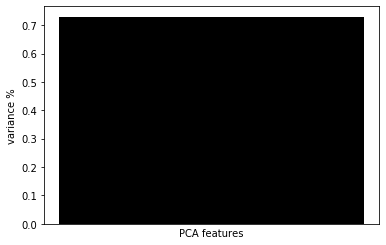

In [42]:
pca1 = PCA(n_components=1)# calculating the pca
principalComponents1 = pca1.fit_transform(X_std)# projecting the data 
features = range(pca1.n_components_)
plt.bar([1], pca1.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components1 = pd.DataFrame(principalComponents1)


In [22]:
kmeans1 = KMeans(n_clusters=3)
#print(kmeans.labels_)
kmeans1.fit(PCA_components1)
#print(kmeans.labels_)
score1 = silhouette_score(PCA_components1,kmeans1.labels_)
print('Silhoutte score is', score1)
labels1 = pd.factorize(label)[0]
len(kmeans1.labels_)
ari1 = adjusted_rand_score(labels1,kmeans1.labels_)
print('Adjusted rand index is', ari1)
#pca 1 component
sscore.append(score1)
ariscore.append(ari1)

Silhoutte score is 0.6754183875905303
Adjusted rand index is 0.8015498244339507


USING 2 COMPONENTS

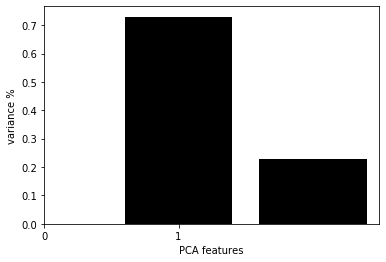

In [39]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X_std)
features = range(pca2.n_components_)
plt.bar([1,2], pca2.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components2 = pd.DataFrame(principalComponents2)

In [24]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(PCA_components2)
score2 = silhouette_score(PCA_components2,kmeans2.labels_)
print('Silhoutte score is', score2)
labels2 = pd.factorize(label)[0]
len(kmeans2.labels_)
ari2 = adjusted_rand_score(labels2, kmeans2.labels_)
print('Adjusted rand index is', ari2)
#pca 2 components
sscore.append(score2)
ariscore.append(ari2)

Silhoutte score is 0.5113245176460453
Adjusted rand index is 0.6011286543750637


USING 3 COMPONENTS

<class 'numpy.ndarray'>


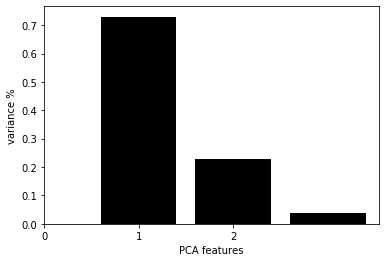

In [36]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X_std)
features = range(pca3.n_components_)
plt.bar([1, 2, 3], pca3.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components3 = pd.DataFrame(principalComponents3)
print(type(principalComponents3))

In [26]:

kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(PCA_components3)
score3 = silhouette_score(PCA_components3,kmeans3.labels_)

print('Silhoutte score is', score3)
labels3 = pd.factorize(label)[0]
ari3 = adjusted_rand_score(labels3, kmeans3.labels_)
print('Adjusted rand index is', ari3)
#pca 3 components
sscore.append(score3)
ariscore.append(ari3)

Silhoutte score is 0.46613062910381436
Adjusted rand index is 0.6201351808870379


USING 4 COMPONENTS

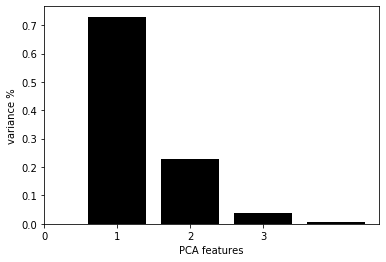

In [33]:
pca4 = PCA(n_components=4)
principalComponents4 = pca4.fit_transform(X_std)
features = range(pca4.n_components_)
plt.bar([1, 2, 3, 4], pca4.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components4 = pd.DataFrame(principalComponents4)

In [28]:

kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(PCA_components4)
score4 = silhouette_score(X_std, kmeans4.labels_)
print('Silhoutte score is', score4)
labels4 = pd.factorize(label)[0]
len(kmeans4.labels_)
ari4 = adjusted_rand_score(labels4, kmeans4.labels_)
print('Adjusted rand index is', ari4)
#PCA 4 components
sscore.append(score4)
ariscore.append(ari4)

Silhoutte score is 0.45937792074496625
Adjusted rand index is 0.6100728505285608


In [29]:
print("Silhoutte scores:\n",sscore)

Silhoutte scores:
 [0.6754183875905303, 0.5113245176460453, 0.46613062910381436, 0.45937792074496625]


In [30]:
print("Adjusted rand index score:\n",ariscore)

Adjusted rand index score:
 [0.8015498244339507, 0.6011286543750637, 0.6201351808870379, 0.6100728505285608]


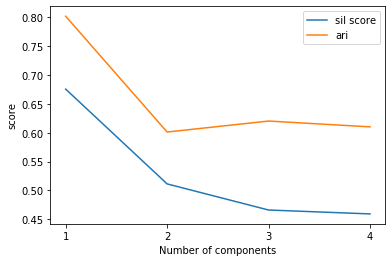

In [31]:
import numpy as np
plt.xlabel('Number of components')
plt.xticks(np.arange(1, 5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('score')
plt.plot([1, 2, 3, 4],sscore,label ='sil score')
plt.plot([1, 2, 3, 4],ariscore,label = 'ari')

plt.legend()

Comments: Silhoutte score is decreasing with the number of components linearly,The best number of components is 1 with respect to Silhoutte score calculated for different components.   

Comments: ARI is high for less number of components, Therefore since Rand index is related to the accuracy, The best number of components is 1 with respect to adjusted rand index.